# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Python Data Visualization (Solutions)

### Learning Objectives
*After this lesson, you will be able to:*
- Use Pandas and Matplotlib to create simple plots

We'll cover plotting line plots, scatter plots, bar plots, and histograms, and a brief introduction on how to manipulate the style of your plots with Matplotlib.


### Part 1: Pandas and Matplotlib

In this lesson, we will introduce how plotting works in Pandas and Matplotlib. It is important to know that Pandas uses Matplotlib behind the scenes to make plots. So, you will notice that Pandas plotting methods often use similar parameter names as Matplotlib methods. Further, you can use Matplotlib functions in combination with Pandas methods to alter the plots after drawing them. For example, you can use Matplotlib's `xlabel` and `title` functions to label the plot's x-axis and title, respectively, after it is drawn.

As we explore different types of plots, notice:

1. Different types of plots are drawn very similarly -- they even tend to share parameter names.
2. In Pandas, calling `plot()` on a `DataFrame` is different than calling it on a `Series`. Although the methods are both named `plot`, they may take different parameters.

*Sometimes Pandas can be a little frustrating... perseverance is key!*

<img src="https://media.giphy.com/media/EPcvhM28ER9XW/giphy.gif" width="200" align="left">

## Plotting with Pandas: How?


Some notes before we start:
- We are going to use the `matplotlib.pyplot` module to help create our plots. This will give us many customization options.
- To make our plots display within this notebook, we will have to set the option `%matplotlib inline`.
- To save our plots to file, we can use `plt.savefig(filename)`
- You can change the *style* of the plots, refer to [Matplotlib Stylesheets](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set the plots to display within the Jupyter notebook
%matplotlib inline

# set stylesheet using pyplot
plt.style.use('ggplot')
# You can try other styles such as 'classic', 'ggplot', grayscale'


### Load in data sets for visualization



In [2]:
# use the orders by product that we joined in the previous lab
# this shows more information about each product - category, subcategory, etc
orders = pd.read_csv('datasets/orders_by_product.csv')
orders.head()

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,...,category,sub_category,description,unit_cost,days_to_ship,order_year,order_month_no,order_day,order_day_name,margin_category
0,ID-2022-83625,2022-07-28,2022-07-31,Second Class,RS-19420,FUR-BO-10000008,465.156,2,0.400000,-255.864,...,Furniture,Bookcases,"Sauder Library with Doors, Traditional",360.51,3,2022,7,3,Thursday,Low
1,IN-2020-85480,2020-07-31,2020-02-08,First Class,CS-12490,FUR-BO-10000021,243.060,2,0.149847,102.060,...,Furniture,Bookcases,"Dania Corner Shelving, Metal",70.50,-174,2020,7,4,Friday,High
2,IN-2020-21206,2020-07-02,2020-12-02,Standard Class,SC-20800,FUR-BO-10000035,1236.330,3,0.000000,519.210,...,Furniture,Bookcases,"Dania Classic Bookcase, Pine",239.04,153,2020,7,3,Thursday,High
3,IN-2019-50060,2019-07-09,2019-09-14,Standard Class,MC-17575,FUR-BO-10000035,2472.660,6,0.149847,1038.420,...,Furniture,Bookcases,"Dania Classic Bookcase, Pine",239.04,67,2019,7,1,Tuesday,High
4,IN-2019-25889,2019-08-12,2019-12-12,Standard Class,BP-11185,FUR-BO-10000035,2596.293,7,0.100000,923.013,...,Furniture,Bookcases,"Dania Classic Bookcase, Pine",239.04,122,2019,8,0,Monday,High


<a id="histograms"></a>
## Histograms: Show the distribution of a numerical variable
---

Histograms help us to see the distribution of a numerical variable, by putting each value in a bin and then plotting the frequency of each bin.

For example, we can visualise the distribution of the `discount` in orders:


<AxesSubplot:ylabel='Frequency'>

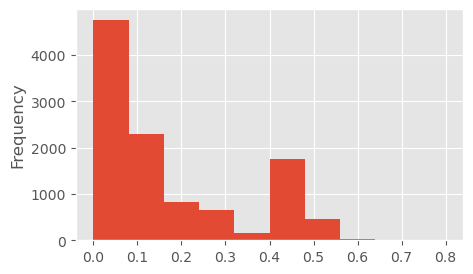

In [3]:
# Create a histogram on the data in the discount column
orders['discount'].plot(kind='hist', figsize=(5,3))



<AxesSubplot:ylabel='Frequency'>

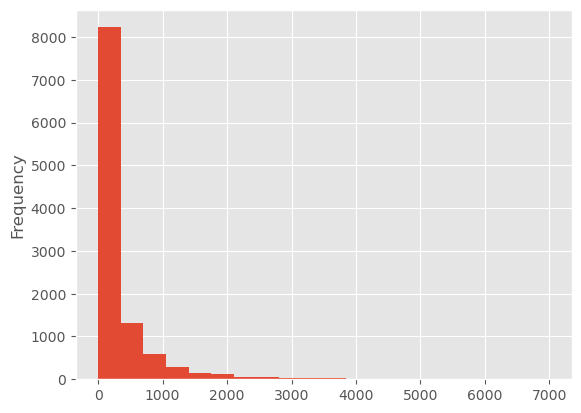

In [4]:
# You can also set the bins parameter, like this:
orders['sales'].plot(kind='hist', bins=20)

#### Using hist()

Pandas also provides another approach using the `hist()` method on the series:

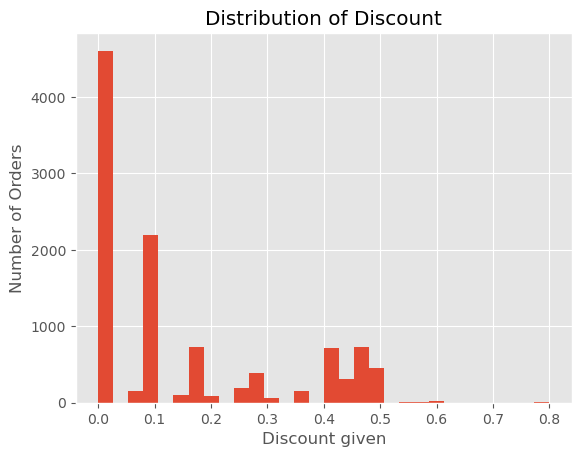

In [11]:
# using hist() and also setting the number of bins required
orders['discount'].hist(bins=30)

# Set the titles
plt.title('Distribution of Discount')
plt.xlabel('Discount given')
plt.ylabel('Number of Orders')

# to remove the output that shows the returned object, use pyplot's show() function
plt.show()

### Making histograms of an entire dataframe:

The `hist()` method is useful to make histograms on the entire DataFrame to compare distributions quickly.

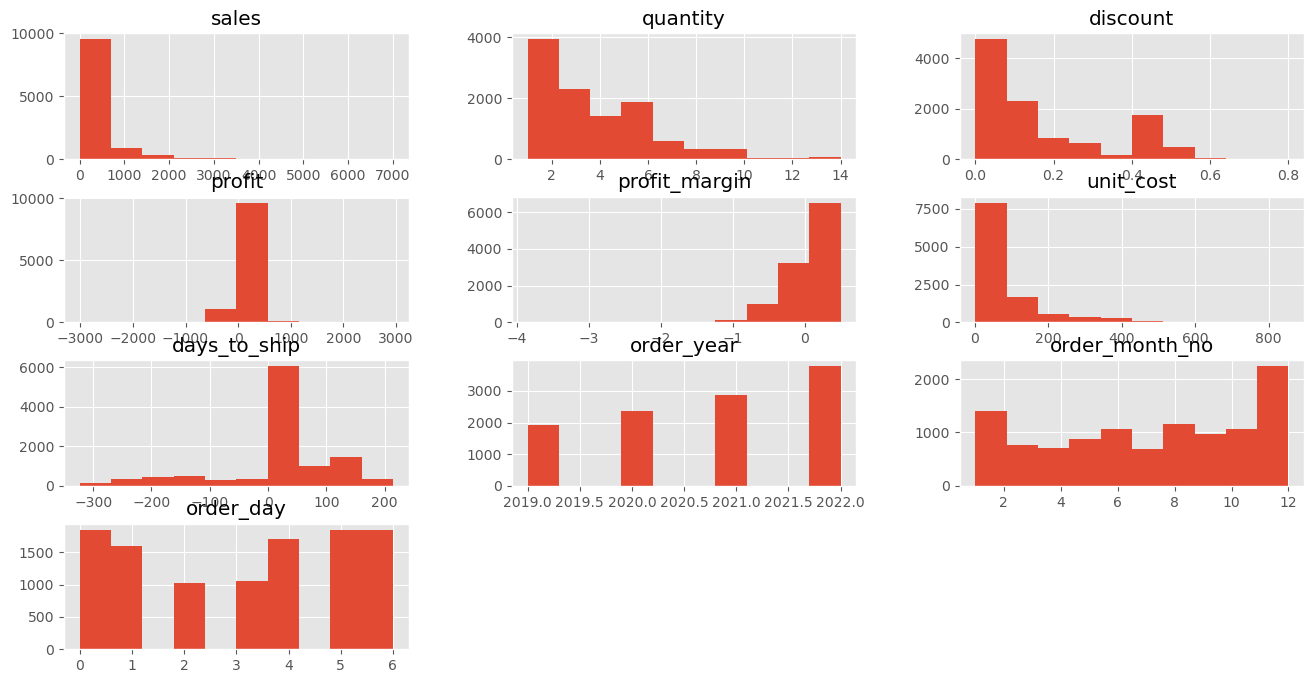

In [7]:
orders.hist(figsize=(16,8))
plt.show()

### Overlapping Histograms

We can index the DataFrame to select the columns that we want to plot. This will show them in the same scale. 


<Figure size 800x300 with 0 Axes>

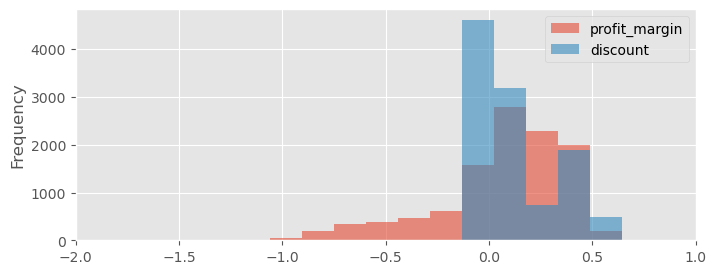

In [12]:
# Set the size of the plot
plt.figure(figsize=(8,3))

# Overlapping histograms to compare discount and profit margin
# plot the histogram of profit margin and discount together
# set the transparency using alpha to show where they overlap
orders[['profit_margin','discount']].plot(kind='hist', alpha=0.6, bins=30, figsize=(8,3), xlim=(-2,1))
plt.show()


### Boxplots: Show Distribution between categories

A boxplot (or box-and-whisker) plot can also be used to give a good indication of how the values in the data are spread out. 

Boxplots are a standardized way of displaying the distribution of data based on a five number summary:
1. minimum value
2. first quartile (Q1)
3. median (Q2)
4. third quartile (Q3)
5. maximum value

We can see these values using the `describe()` method:


In [24]:
# Get the summary of the info
summary = orders['quantity'].describe()
print(summary)

count    10923.000000
mean         3.753364
std          2.260655
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         14.000000
Name: quantity, dtype: float64


<AxesSubplot:>

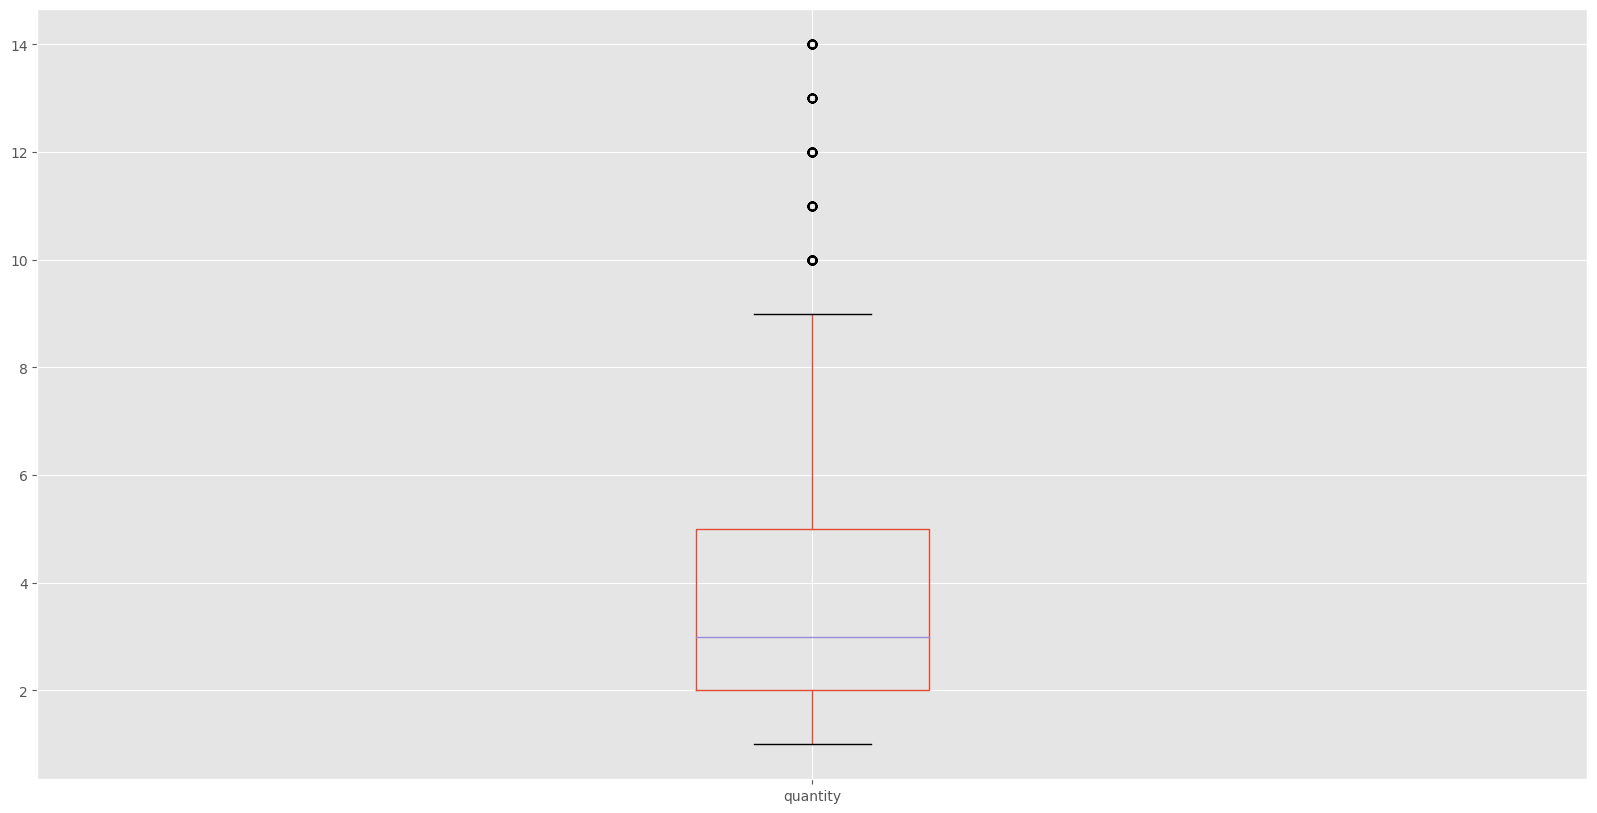

In [19]:
orders.boxplot('quantity',figsize=(20,10))

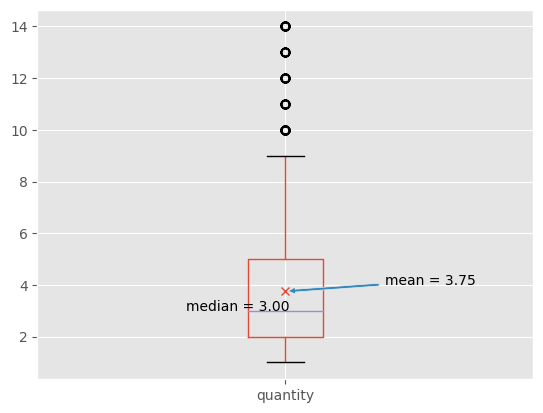

In [27]:
# Draw a boxplot for the orders['quantity'] series
orders.boxplot('quantity')

# Store the mean and median values for clarity
meanVal = summary['mean']
medianVal = summary['50%']

# Mark the mean on the boxplot
plt.plot(1,meanVal,'x')

# Add text to show the median value
plt.text(0.8,medianVal,f'median = {medianVal:.2f}')

# Another way to add text, by annotating with an optional arrow 
plt.annotate(xy=(1,meanVal),xytext=(1.2, 4), text= f'mean = {meanVal:.2f}', arrowprops=dict(arrowstyle='simple'))
plt.show()

### Boxplots to compare distribution between categories

The Pandas `boxplot` method allows us to visualize the distribution by categories quickly.
This allows us to show the relationship between numerical and categorical variables. 

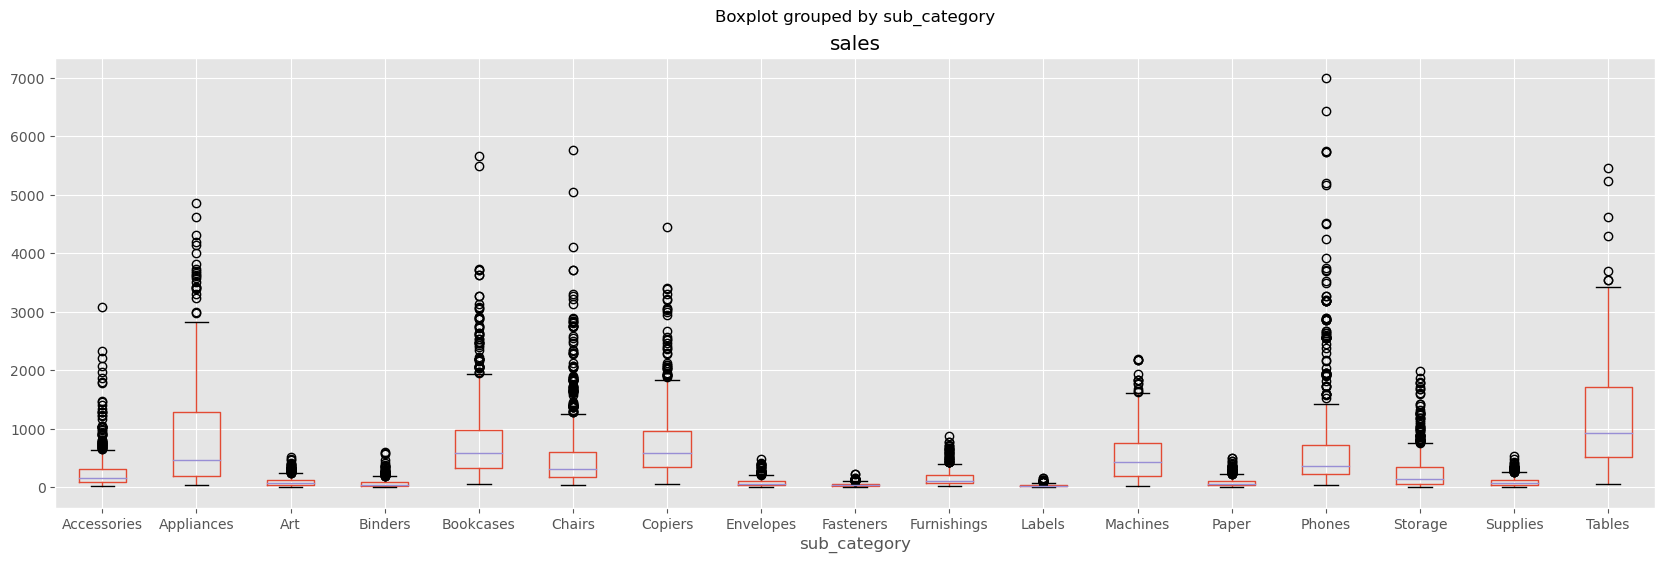

In [28]:
# Use the kwarg by= to specify which category to search
orders.boxplot('sales', by='sub_category',figsize=(20,6))
plt.show()

Let's see how else we can compare the distribution of variables.

<a id="scatter-plots"></a>
## Scatter plots: Show the relationship between two numerical variables
---


Scatter plots are very good at showing the **interaction between two numeric variables** (especially when they're continuous)!

Here is an example of creating the scatter plot and setting up the columns to be used on the x- and y- axes, as well as the marker to be used, the size (s) and color (c). Alpha is used to set the transparency. 

You can check the different [symbols to be used for markers](https://matplotlib.org/stable/api/markers_api.html) and list of named [colors] (https://matplotlib.org/stable/gallery/color/named_colors.html)

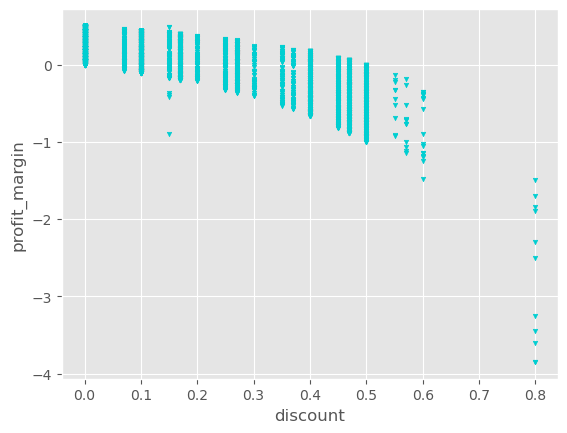

In [39]:
# Create a scatter plot
orders.plot(kind='scatter', x='discount', y='profit_margin', marker='v', s=10, c='darkturquoise')
plt.show()

<a id="line-plots"></a>
## Line plots: Show the trend of a numerical variable over time
---

Line plots are useful for showing trends. Let's see how we can view the sales over time.

In [40]:
# Let's have a look at the orders again
orders.head()

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,...,category,sub_category,description,unit_cost,days_to_ship,order_year,order_month_no,order_day,order_day_name,margin_category
0,ID-2022-83625,2022-07-28,2022-07-31,Second Class,RS-19420,FUR-BO-10000008,465.156,2,0.400000,-255.864,...,Furniture,Bookcases,"Sauder Library with Doors, Traditional",360.51,3,2022,7,3,Thursday,Low
1,IN-2020-85480,2020-07-31,2020-02-08,First Class,CS-12490,FUR-BO-10000021,243.060,2,0.149847,102.060,...,Furniture,Bookcases,"Dania Corner Shelving, Metal",70.50,-174,2020,7,4,Friday,High
2,IN-2020-21206,2020-07-02,2020-12-02,Standard Class,SC-20800,FUR-BO-10000035,1236.330,3,0.000000,519.210,...,Furniture,Bookcases,"Dania Classic Bookcase, Pine",239.04,153,2020,7,3,Thursday,High
3,IN-2019-50060,2019-07-09,2019-09-14,Standard Class,MC-17575,FUR-BO-10000035,2472.660,6,0.149847,1038.420,...,Furniture,Bookcases,"Dania Classic Bookcase, Pine",239.04,67,2019,7,1,Tuesday,High
4,IN-2019-25889,2019-08-12,2019-12-12,Standard Class,BP-11185,FUR-BO-10000035,2596.293,7,0.100000,923.013,...,Furniture,Bookcases,"Dania Classic Bookcase, Pine",239.04,122,2019,8,0,Monday,High


We can create a new column to determine the month and year based on the order date. We will need the `pd.to_datetime()` to convert the `order_date` into a Python `DateTime` object, then use `dt.to_period('M')` to classify the order into the correct time period.

For the time periods you can use, refer to: the [Pandas Documentation on Time Series](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases)


In [41]:
# Determine the month and year of the order based on the order date

orders['order_month'] = pd.to_datetime(orders['order_date']).dt.to_period('M')
orders[['order_date', 'order_month']].head(10)

,order_date,order_month
0,2022-07-28,2022-07
1,2020-07-31,2020-07
2,2020-07-02,2020-07
3,2019-07-09,2019-07
4,2019-08-12,2019-08
5,2022-02-04,2022-02
6,2021-07-26,2021-07
7,2022-01-29,2022-01
8,2021-01-12,2021-01
9,2021-03-12,2021-03


Now we can use `groupby` to determine the number of orders for each time period.

In [42]:
# Store the value counts in a series called plot_data, sorted by the order month
#plot_data = orders['order_month'].value_counts().sort_index()
plot_data = orders.groupby('order_month')['order_id'].count()
plot_data.head(12)

order_month
2019-01    100
2019-02    124
2019-03    171
2019-04    138
2019-05    102
2019-06    153
2019-07    141
2019-08    189
2019-09    200
2019-10    201
2019-11    174
2019-12    231
Freq: M, Name: order_id, dtype: int64

#### Plotting!

Now we can create the plot. The default kind of plot for a Pandas `plot()` is a line plot, so we can just call `plot()` on the `plot_data` that we have set up.

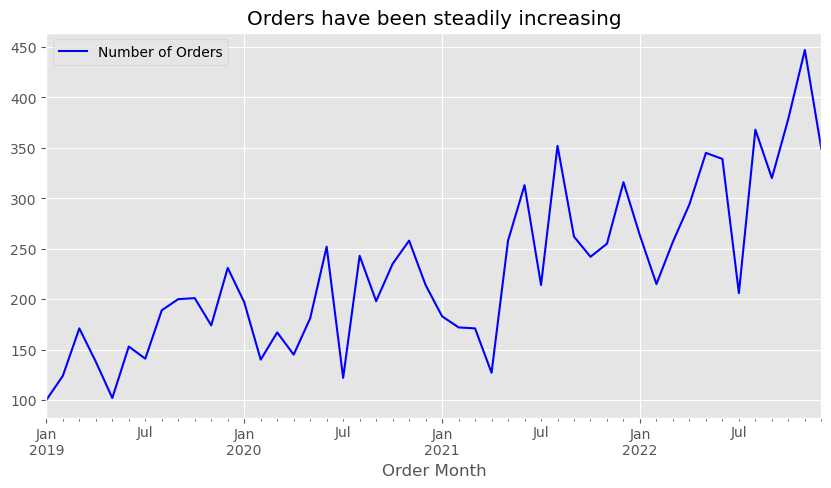

In [43]:
# Use default plot method to create a line plot - the axis tick labels are automatically set for the series. 
plot_data.plot(c='Blue', figsize=(10,5))
plt.title('Orders have been steadily increasing')
plt.xlabel('Order Month')
plt.legend(['Number of Orders'])

# Save the file
plt.savefig('Orders_by_month.png')
plt.show()

#### Plotting with multiple groupby levels

Using Groupby, we can also calculate the aggregate by multiple categories.


In [44]:
# Obtain the mean sales value by order month and product category
plot_data = orders.groupby(['order_month','category'])['sales'].mean().unstack()
plot_data.head()

category,Furniture,Office Supplies,Technology
order_month,,,
2019-01,291.376148,120.054881,483.789621
2019-02,495.610682,160.761435,506.103281
2019-03,525.671858,122.385473,395.088217
2019-04,646.411447,177.927427,467.872592
2019-05,549.947844,169.985088,641.661111


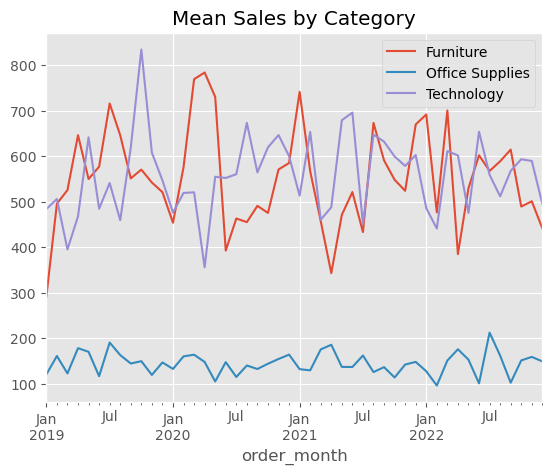

In [45]:
# Plot the grouped-by data frame 
plot_data.plot()
plt.title('Mean Sales by Category')
plt.legend(['Furniture','Office Supplies','Technology'])
plt.show()

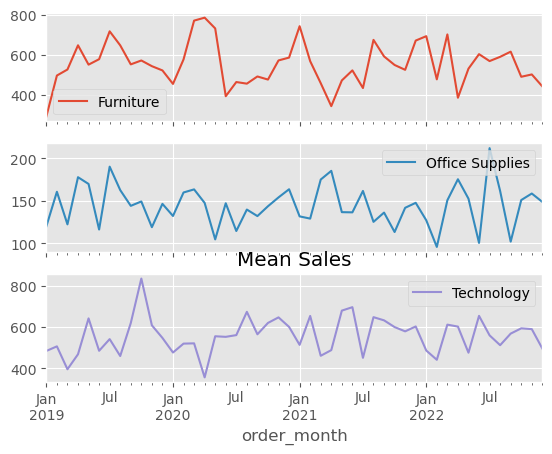

In [47]:
# Using subplots to show on separate plots
# Notice the y axis tick labels are different
plot_data.plot(subplots=True, sharex=True)

# where does the title go?
plt.title('Mean Sales')
plt.show()


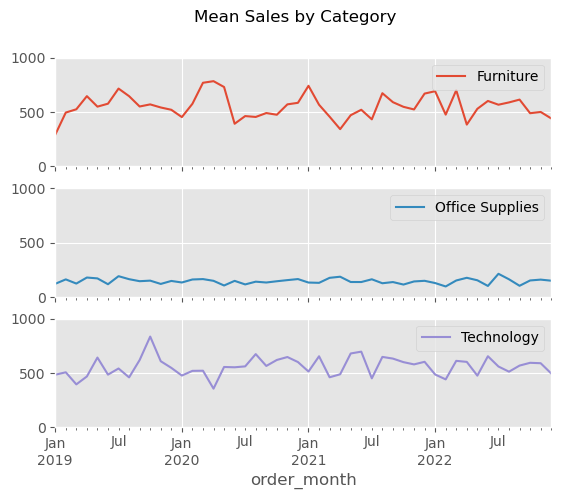

In [48]:
# Using subplots to show on separate plots
# Make the title and y-limits the same for comparison
plot_data.plot(subplots=True, title='Mean Sales by Category', ylim=(0,1000))
plt.show()


### Knowledge Check <img src="http://cdn.shopify.com/s/files/1/1061/1924/products/Up_Pointing_Hand_Emoji_grande.png?v=1480481048" width="30px" align="left">

Why does it make sense to use a line plot for these visualizations? 

<a id="bar-plots"></a>
## Bar Plots: Show a numerical comparison across different categories
---

Let's try to find the total sales for each sub category of orders.
This means we have to perform a `groupby()` to aggregate the data on the column first. 

In [49]:
# Find total sales for each sub category
plot_data = orders.groupby('sub_category')['sales'].sum()
plot_data

sub_category
Accessories    185258.5545
Appliances     307147.2570
Art             62371.0839
Binders         62937.7467
Bookcases      500275.5585
Chairs         508395.7782
Copiers        492851.0352
Envelopes       51987.9786
Fasteners       27770.8179
Furnishings    100936.9419
Labels          22264.5150
Machines       189253.6401
Paper           59601.0294
Phones         479762.9562
Storage        214569.1614
Supplies        71112.6216
Tables         225098.8119
Name: sales, dtype: float64

<AxesSubplot:xlabel='sub_category'>

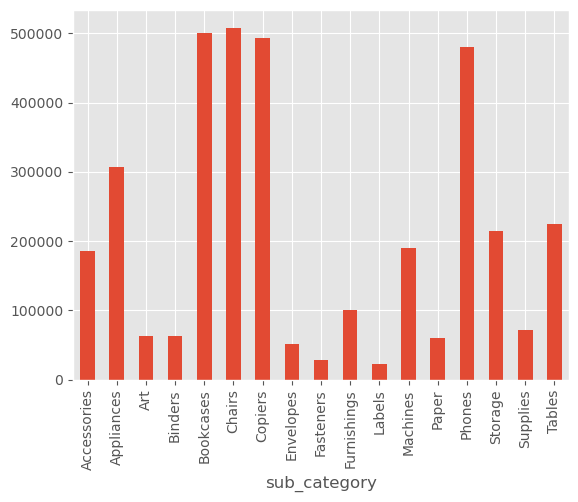

In [50]:
# Plot the total sales
plot_data.plot(kind='bar')

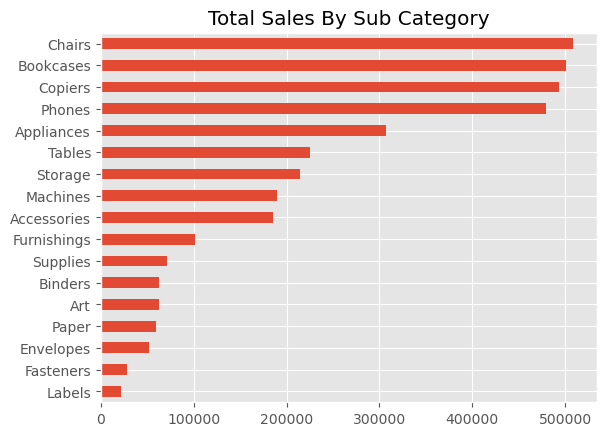

In [51]:
sorted = plot_data.sort_values(ascending=True)
sorted.plot(kind='barh')
plt.title('Total Sales By Sub Category')
plt.ylabel('')
plt.show()

#### Quick Exercise

Print the 5 highest sales values by subcategory as a horizontal bar plot with blue bars.

In [52]:
sorted

sub_category
Labels          22264.5150
Fasteners       27770.8179
Envelopes       51987.9786
Paper           59601.0294
Art             62371.0839
Binders         62937.7467
Supplies        71112.6216
Furnishings    100936.9419
Accessories    185258.5545
Machines       189253.6401
Storage        214569.1614
Tables         225098.8119
Appliances     307147.2570
Phones         479762.9562
Copiers        492851.0352
Bookcases      500275.5585
Chairs         508395.7782
Name: sales, dtype: float64

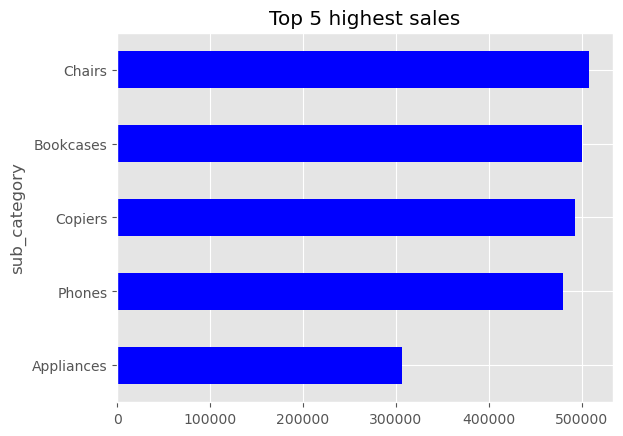

In [53]:
# print 5 hightest sales values 
sorted.tail(5).plot(kind='barh', title='Top 5 highest sales', color="blue")    
plt.show()
# because it was ascending=True so ordered from lowest to highest

#### Comparing Multiple Categories

A bar chart is also useful for comparing values for multiple categories. 
For example, we could compare the mean profit of each `category` by `ship_mode`


In [54]:
# Group the orders by category, then ship mode
plot_data = orders.groupby(['category','ship_mode'])['profit'].mean().unstack()
plot_data

ship_mode,First Class,Same Day,Second Class,Standard Class
category,,,,
Furniture,44.142512,59.528756,34.759487,58.033556
Office Supplies,15.183833,13.285223,17.853038,17.532599
Technology,85.893628,66.164593,82.091012,86.913927


Text(0.5, 1.0, 'Mean Profit by Ship Mode')

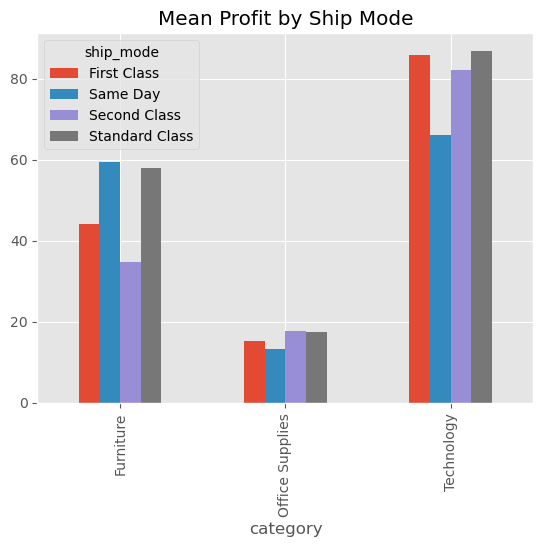

In [61]:
plot_data.plot(kind='bar')
plt.title('Mean Profit by Ship Mode')

#### Stacked Bar Plot

We can use the parameter `stacked=True` to create a stacked bar plot to show the totals by category.

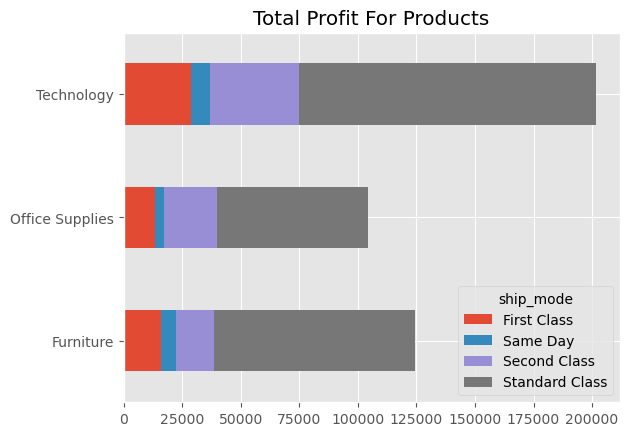

In [62]:
# Viewing the total profit
plot_data = orders.groupby(['category','ship_mode'])['profit'].sum().unstack()

# For sum it is more meaningful when stacked
plot_data.plot(kind='barh', stacked=True)
plt.title('Total Profit For Products')
plt.ylabel('')
plt.show()

<a id="summary"></a>
### Summary

In this lesson, we showed examples of how to create a variety of plots using Pandas and Matplotlib. We also showed how to use each plot to effectively display data.

Do not be concerned if you do not remember everything — this will come with practice! Although there are many plot styles, many similarities exist between how each plot is drawn. For example, they have most parameters in common, and the same Matplotlib functions are used to modify the plot area.

We looked at:
- Histograms: for visualizing distributions of numerical variables
- Box plots: for comparing distributions across categorical variables
- Scatter plots: for analysing relationships between numerical variables
- Line plots: suitable for plotting trends over time
- Bar plots: for comparing categorical variables


#### Homework and Review

Let's try to use the `returned_orders.csv` file that we created in the previous homework.

Q1. Read in the file into a DataFrame called `returns`.

In [ ]:
# Q1 Answer


Q2. Create a new column `quarter` that determimes the quarter that the order was placed based on the `order_date`. (The offset to use is 'Q')

In [ ]:
 # Q2 Determine the quarter of the order based on the order date


Q3. Create a line plot to compare the number of orders that have `returned == 'Yes'` and those with `returned == 'No'`, by quarter.
Hint: group by quarter, then returned.

In [ ]:
#Q3 Answer

Q4. Create subplots with bar plots to compare the total sales values of orders that were returned vs not returned by each `margin_category`. 

In [ ]:
# Q4 Answer


Q5. What other plots would you like to create to analyse returns? Explain and try to plot it. 


In [ ]:
# Q5 Answer